In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.columns.values.tolist()
     


['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

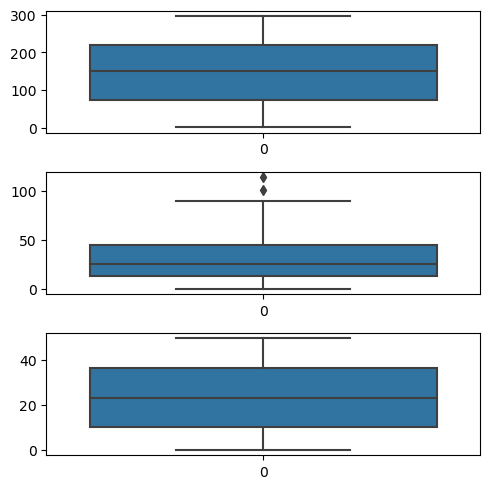

In [10]:
fig, axs=plt.subplots(3, figsize=(5,5))
plt1=sns.boxplot(data['TV'],ax=axs[0])
plt2=sns.boxplot(data['Newspaper'],ax=axs[1])
plt3=sns.boxplot(data['Radio'],ax=axs[2])
plt.tight_layout()

<Axes: xlabel='Newspaper', ylabel='Density'>

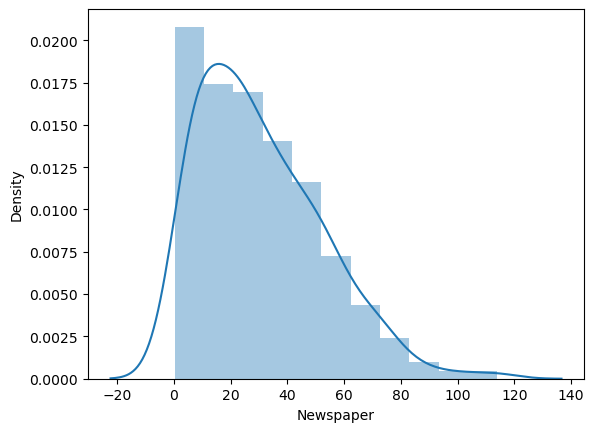

In [11]:
 sns.distplot(data['Newspaper'])

In [12]:
iqr=data.Newspaper.quantile(0.75)-data.Newspaper.quantile(0.25)

In [13]:
lower_bridge=data['Newspaper'].quantile(0.25)-(iqr*1.5)
upper_bridge=data['Newspaper'].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [14]:
df=data.copy()

In [15]:
df.loc[df['Newspaper']>=93,'Newspaper']=93

<Axes: >

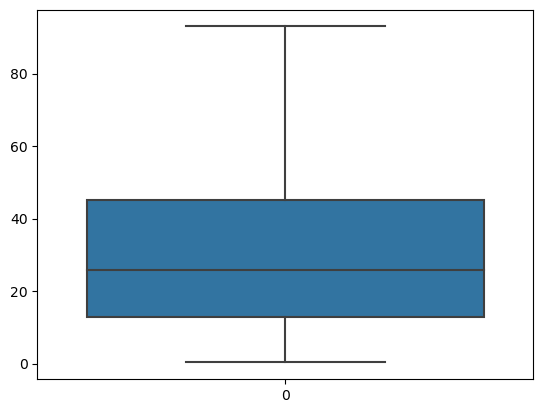

In [16]:
sns.boxplot(df['Newspaper'])

<Axes: >

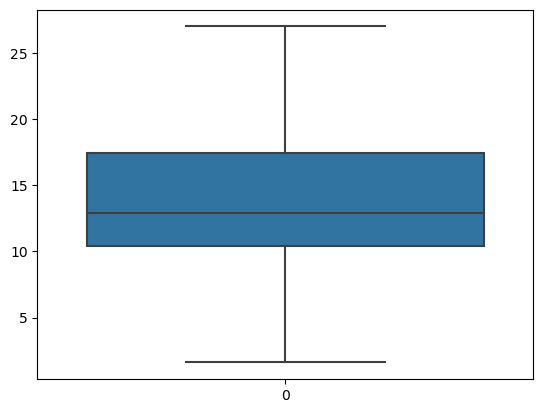

In [17]:
sns.boxplot(df['Sales'])

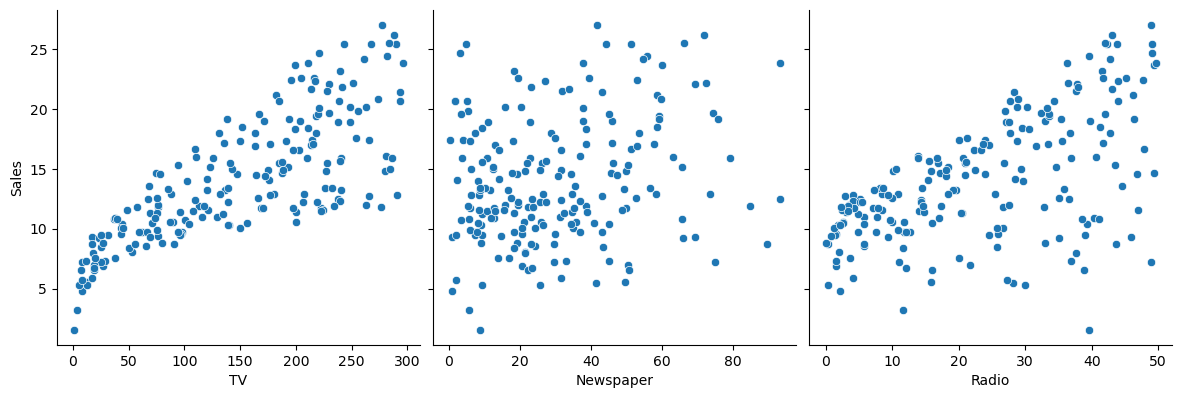

In [18]:
sns.pairplot(df, x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4, aspect=1, kind='scatter')
plt.show()

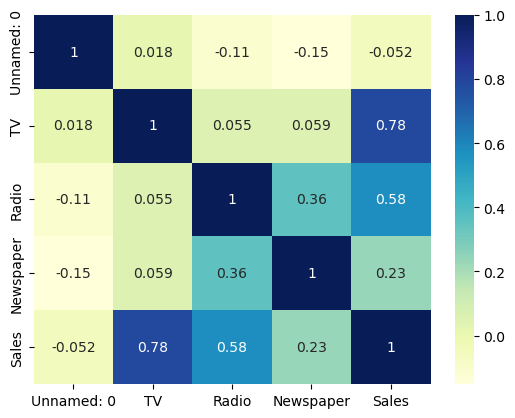

In [19]:
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True)
plt.show()

In [20]:
important_feature=list(data.corr()['Sales'][(data.corr()['Sales']>+0.5)|(data.corr()['Sales']<-0.5)].index)

In [21]:
print(important_feature)

['TV', 'Radio', 'Sales']


In [22]:
x=df['TV']
y=df['Sales']

In [23]:
x=x.values.reshape(-1,1)

In [24]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [25]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [26]:
print(x.shape,y.shape)

(200, 1) (200,)


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.33)

In [28]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [29]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
knn=KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [31]:
knn_train_pred=knn.predict(x_train)

In [32]:
knn_test_pred=knn.predict(x_test)

In [33]:
print(knn_train_pred,knn_test_pred)

[11.88 13.22 13.04 16.02  5.96 14.66  8.42 19.46 18.82  8.42 11.88 20.82
 20.02  7.96  9.7  17.06 19.98  6.94 17.4  19.98 17.88 10.62  7.96 16.52
 14.66 13.04 14.02 18.34 19.58 11.56 13.26 14.26 19.3  17.3   5.96 12.54
 10.88 16.58 20.46 20.02 12.38 10.16 11.94 17.28  9.52 16.14 16.14 13.22
 11.58  5.16 18.82 11.86 15.84 12.54 18.44  6.04 11.86 12.4  17.06  7.24
 16.76 12.54 15.84 19.46 18.72 16.5  16.14 19.28 15.6  16.26 20.36 14.36
 19.98 18.84 11.58 11.58 11.44 20.62 14.8  17.   10.16 21.78 14.8  19.98
 15.9   9.62 14.98 11.94 16.14 18.72 21.78 12.08 16.9  17.66 10.06  5.96
 11.58 19.98  5.96  8.42 19.46 14.8  15.84 20.8  11.2  18.72 21.78  5.96
 17.54 19.58 17.   13.04 11.62 13.22 17.28 13.04 13.04 17.44 14.82 17.28
  6.94 10.88 12.44 18.72  7.96 18.72 14.82 11.2   9.62 16.76 14.8  14.36
 17.66  9.06] [17.28 17.44 18.84 11.2  11.58  9.06  5.16 15.1  19.26 13.04 11.88 11.56
  8.42 10.16  7.24 17.06 17.66  7.96 11.94 21.78 10.16 11.18 19.3   7.24
 20.76 11.58 10.06  7.24 10.16  8.42 

In [34]:
Result=pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Varience"])

In [35]:
r2=r2_score(y_test,knn_test_pred)
r2_train=r2_score(y_train,knn_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,knn_test_pred))
varience=r2_train-r2
Result=Result.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Varience":varience},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5285359811512635
RMSE: 3.4335069094105077


In [36]:
Result.head()

,Model,Train R2,Test R2,Test RMSE,Varience
0,K-Nearest Neighbors,0.649122,0.528536,3.433507,0.120586


In [37]:
svr=SVR().fit(x_train,y_train)
svr

SVR()

In [38]:
svr_train_pred=svr.predict(x_train)
svr_test_pred=svr.predict(x_test)

In [39]:
print(svr_train_pred,svr_test_pred)

[10.86893156 12.62528894 13.30396556 15.59628871  7.31031146 15.03571435
  7.88602255 18.63126004 17.71711761  7.94814187 10.80004975 18.78246139
 18.39335057  7.66762608  9.87428261 18.52341942 18.86840819  7.46639703
 18.34592988 18.86294439 15.9855393  10.39229003  7.66361305 18.25460186
 15.00025143 13.2625748  12.71619977 17.19719164 17.45695861 11.04836031
 13.76605177 16.79803136 18.55646109 17.12731821  7.3394865  11.46845525
 12.06497148 17.90028404 17.3513177  18.46032194 12.53191283  8.96299879
 13.69084713 18.53243331  8.59143536 14.52802162 14.35101103 12.63465163
 10.88988521  7.25154256 17.72732673 11.8802587  14.61616979 11.51577314
 18.17353828  7.4210435  11.8691824  11.40254707 18.52643661  7.60519148
 16.96137774 11.57477779 12.99618667 18.65944504 18.14836666 15.81542846
 14.40395116 17.58139799 15.45365281 16.69994526 17.69144719 15.11308444
 18.86128935 17.53317325 10.91072448 10.90031918 12.12942828 18.72828247
 16.53267872 16.39513469  9.05660373 18.15217304 16

In [40]:
r2=r2_score(y_test,svr_test_pred)
r2_train=r2_score(y_train,svr_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,svr_test_pred))
varience=r2_train-r2
Result=Result.append({"Model":"Support vector machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Varience":varience},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.6159806961964231
RMSE: 3.0987759501237915


In [41]:
Result.head()

,Model,Train R2,Test R2,Test RMSE,Varience
0,K-Nearest Neighbors,0.649122,0.528536,3.433507,0.120586
1,Support vector machine,0.587403,0.615981,3.098776,-0.028577


In [42]:
import statsmodels.api as sm

In [43]:
x_train_constant=sm.add_constant(x_train)

In [44]:
model=sm.OLS(y_train,x_train_constant).fit()

In [45]:
model.params

const    6.988097
x1       0.048541
dtype: float64

In [46]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     201.5
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           2.42e-28
Time:                        17:49:13   Log-Likelihood:                -350.42
No. Observations:                 134   AIC:                             704.8
Df Residuals:                     132   BIC:                             710.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9881      0.597     11.696      0.0

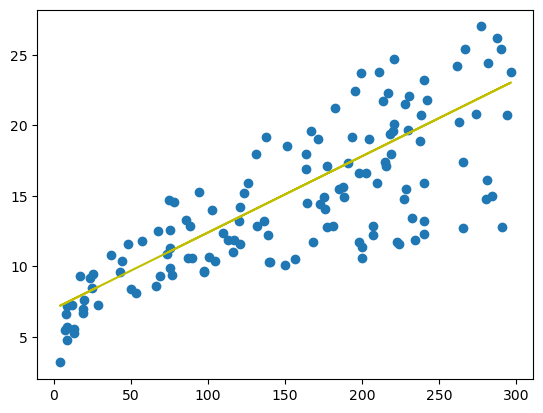

In [47]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955+0.0541*x_train,'y')
plt.show()

In [48]:
y_train_pred=model.predict(x_train_constant)
res=(y_train-y_train_pred)
res
    

37     4.085870
7      0.377243
145   -3.498437
97    -0.463378
56    -1.842448
         ...   
43    -4.131286
55     7.057045
197   -2.779902
104    2.149373
91    -1.076377
Name: Sales, Length: 134, dtype: float64

In [49]:
y_train_pred

array([10.61412961, 12.82275743, 13.79843697, 15.96337764,  7.34244797,
       15.51679795,  8.14337894, 20.64761026, 17.68173862,  8.20648259,
       10.55102596, 20.27384248, 21.05050281,  7.90067258,  9.77921976,
       18.6282934 , 19.7398885 ,  7.62884147, 18.37102467, 19.86124167,
       16.26433352, 10.19667469,  7.89581846, 18.25452562, 15.48767319,
       13.74504157, 12.96352711, 17.22059655, 17.4438864 , 10.78402406,
       14.3420992 , 16.89537004, 20.78837994, 17.16234703,  7.40555162,
       11.2208955 , 11.97328519, 17.86134132, 17.35165798, 20.94856614,
       12.67713362,  9.07537133, 14.25957904, 18.64285578,  8.77926958,
       15.08478064, 14.92459445, 12.83731981, 10.63354612,  7.1871159 ,
       17.69144688, 11.72087058, 15.16244667, 11.27429089, 18.15744307,
        7.55602956, 11.7063082 , 11.14808359, 18.63314753,  7.82300655,
       17.02643147, 11.34224867, 13.38098204, 20.58936073, 18.12831831,
       16.13327209, 14.97313572, 17.55553132, 15.85173272, 16.81

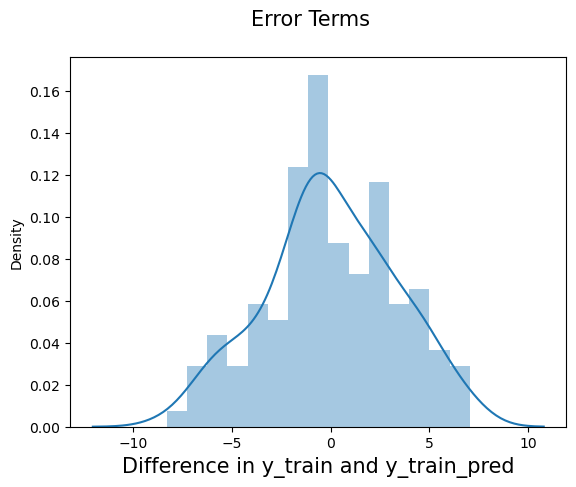

In [50]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('Difference in y_train and y_train_pred',fontsize=15)
plt.show()

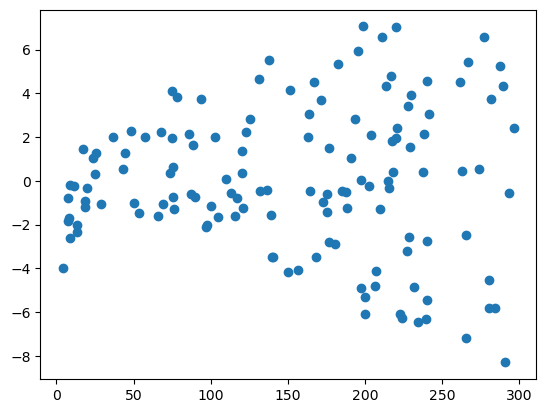

In [51]:
plt.scatter(x_train,res)
plt.show()

In [52]:
x_test_constant=sm.add_constant(x_test)
y_pred=model.predict(x_test_constant)

In [53]:
y_pred

array([18.79333372, 16.36627019, 17.49242767, 10.34715262, 10.69664977,
        8.51714672,  7.25021956, 13.50718934, 19.30787119, 13.92464427,
       12.20142916, 10.8811066 ,  8.20162846,  8.90547689,  7.80844417,
       18.60402276, 18.51179435,  7.92979735, 14.25472491, 21.20583487,
        9.15789149, 11.6334963 , 20.75440106,  7.85698544, 20.8709001 ,
       10.69179565, 10.01221786,  7.82300655,  9.08022546,  8.32298164,
       16.10900145, 14.13822586, 17.94871561,  8.84237323, 16.65266368,
        9.88115643, 11.65776693, 17.34680385, 13.84697824, 19.1671015 ,
        7.02207558, 15.24982096, 15.02653112, 19.38553722,  8.28900275,
       13.55087649, 17.78367529, 13.26933712, 17.21574242, 16.93905718,
       19.74959675, 15.96337764, 17.59436433, 10.2355077 , 10.30831961,
       11.56068439, 11.37622756, 19.04574833,  8.83266498, 12.31792821,
       12.36161536, 19.06516484, 20.41946629,  9.71611611, 10.4151104 ,
       13.7498957 ])

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [55]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.1149676687447125

In [56]:
r2=r2_score(y_test,y_pred)

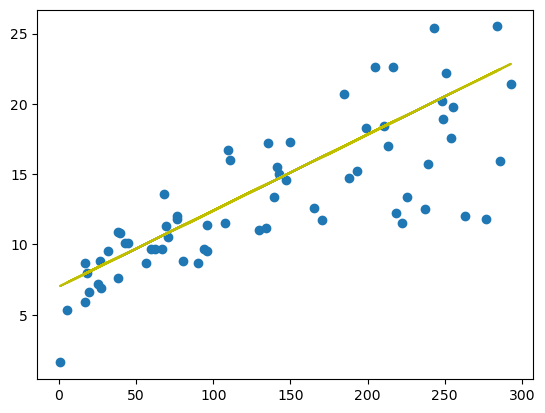

In [57]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955+0.0541*x_test,'y')
plt.show()